In [2]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import pandas as pd
import csv
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from segment_anything import sam_model_registry, SamPredictor
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

2025-05-28 16:54:47.962982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-28 16:54:48.685094: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/asma/thermal-cnn/lib/python3.7/site-packages/cv2/../../lib64:
2025-05-28 16:54:48.685155: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/asma/thermal-cnn/lib/python3.7/site-packages/cv2/../../l

In [3]:
import os
import cv2
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from segment_anything import sam_model_registry, SamPredictor

In [4]:
import os
import csv
import numpy as np

# Path to Cable Entry CSV files
cable_entry_dir = './data/organized1/RMU/Cable Entry/'

# Check CSV dimensions
for file in os.listdir(cable_entry_dir):
    if file.endswith('.csv'):
        csv_path = os.path.join(cable_entry_dir, file)
        with open(csv_path, 'r', encoding='utf-16', errors='ignore') as f:
            reader = csv.reader(f)
            rows = [row for row in reader if row and row[0].strip().isdigit()]
            matrix = np.array([[float(val) for val in row[1:] if val.strip()] for row in rows], dtype=np.float32)
            print(f"{file} -> {matrix.shape}")

IR002448.csv -> (240, 320)
IR_07500.csv -> (240, 320)
IR002324.csv -> (240, 320)
IR002345.csv -> (240, 320)
IR_07422.csv -> (240, 320)
IR_06914.csv -> (240, 320)
IR_06850.csv -> (240, 320)
IR_07068.csv -> (240, 320)
IR_07202.csv -> (240, 320)
IR002462.csv -> (240, 320)
IR_07545.csv -> (240, 320)
IR_07502.csv -> (240, 320)
IR_07086.csv -> (240, 320)
IR_07133.csv -> (240, 320)
IR_07483.csv -> (240, 320)
IR_06756.csv -> (240, 320)
IR_07546.csv -> (240, 320)
IR_06838.csv -> (240, 320)
IR_07048.csv -> (240, 320)
IR002487.csv -> (240, 320)
IR_07543.csv -> (240, 320)
IR_07046.csv -> (240, 320)
IR_07064.csv -> (240, 320)
IR_06840.csv -> (240, 320)
IR_07182.csv -> (240, 320)
IR_07515.csv -> (240, 320)
IR002491.csv -> (240, 320)
IR_07200.csv -> (240, 320)
IR_07412.csv -> (240, 320)
IR_07406.csv -> (240, 320)
IR002365.csv -> (240, 320)
IR_07066.csv -> (240, 320)
IR_06760.csv -> (240, 320)
IR_07414.csv -> (240, 320)
IR_07136.csv -> (240, 320)
IR002506.csv -> (240, 320)
IR002327.csv -> (240, 320)
I

In [5]:
import os
import cv2

# Paths
base_dir = './data/organized1/RMU/Cable Entry/'
sample_dir = './data/sample_cable_entry/'
os.makedirs(sample_dir, exist_ok=True)

# Target file
target_file = 'IR_06756.png'
source_path = os.path.join(base_dir, target_file)
target_path = os.path.join(sample_dir, target_file)

# Resize and save
if os.path.exists(source_path):
    img = cv2.imread(source_path)
    resized_img = cv2.resize(img, (320, 240), interpolation=cv2.INTER_LINEAR)
    cv2.imwrite(target_path, resized_img)
    print(f"{target_file} resized and saved to {sample_dir}")
else:
    print(f"{target_file} not found in {base_dir}")

IR_06756.png resized and saved to ./data/sample_cable_entry/


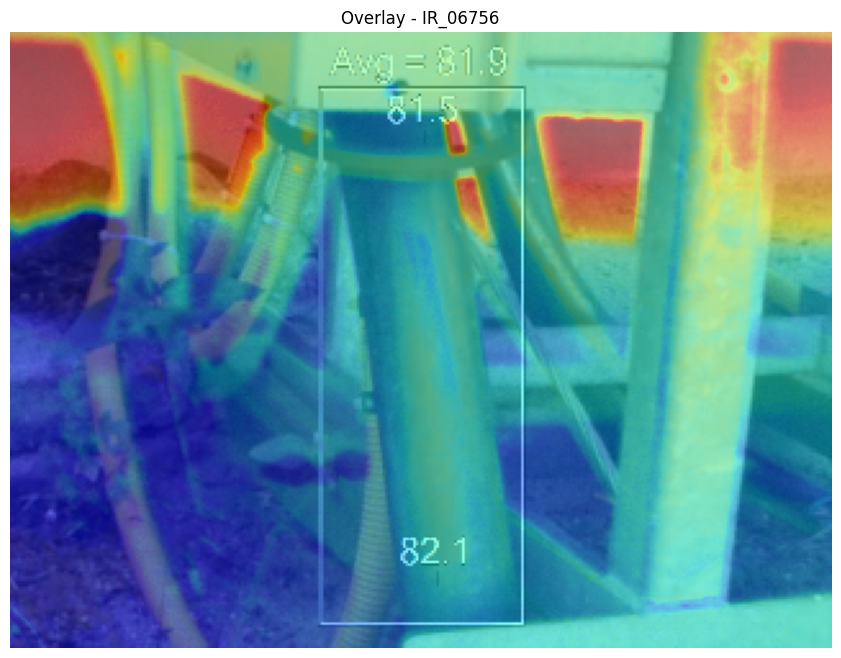

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

# Paths
csv_path = './data/organized1/RMU/Cable Entry/IR_06756.csv'
img_path = './data/sample_cable_entry/IR_06756.png'

# Load thermal data
def load_smartview_csv(path):
    with open(path, 'r', encoding='utf-16', errors='ignore') as f:
        reader = csv.reader(f)
        rows = [row for row in reader if row and row[0].strip().isdigit()]
        matrix = np.array([[float(val) for val in row[1:] if val.strip()] for row in rows], dtype=np.float32)
    return matrix

thermal_matrix = load_smartview_csv(csv_path)

# Load resized image
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Overlay the thermal data
plt.figure(figsize=(12, 8))
plt.imshow(img_rgb)
plt.imshow(thermal_matrix, cmap='jet', alpha=0.5)
plt.title("Overlay - IR_06756")
plt.axis('off')
plt.show()

In [7]:
import os
import cv2

# Base paths
source_dir = './data/organized1/'
target_dir = './data/full_sample_resized/'
os.makedirs(target_dir, exist_ok=True)

# Loop through all subdirectories in organized1
for root, _, files in os.walk(source_dir):
    for file in files:
        if file.endswith('.png'):
            # Preserve the directory structure
            relative_path = os.path.relpath(root, source_dir)
            target_subdir = os.path.join(target_dir, relative_path)
            os.makedirs(target_subdir, exist_ok=True)

            # Full paths for source and target files
            source_file = os.path.join(root, file)
            target_file = os.path.join(target_subdir, file)

            # Resize the image
            img = cv2.imread(source_file)
            resized_img = cv2.resize(img, (320, 240), interpolation=cv2.INTER_LINEAR)
            cv2.imwrite(target_file, resized_img)

            print(f"Resized: {source_file} -> {target_file}")

Resized: ./data/organized1/VCB/Cable/IR002496.png -> ./data/full_sample_resized/VCB/Cable/IR002496.png
Resized: ./data/organized1/VCB/Cable/IR_08504.png -> ./data/full_sample_resized/VCB/Cable/IR_08504.png
Resized: ./data/organized1/VCB/Cable/IR_08472.png -> ./data/full_sample_resized/VCB/Cable/IR_08472.png
Resized: ./data/organized1/VCB/Cable/IR002443.png -> ./data/full_sample_resized/VCB/Cable/IR002443.png
Resized: ./data/organized1/VCB/Cable/IR002495.png -> ./data/full_sample_resized/VCB/Cable/IR002495.png
Resized: ./data/organized1/VCB/Cable/IR_08403.png -> ./data/full_sample_resized/VCB/Cable/IR_08403.png
Resized: ./data/organized1/VCB/Cable/IR_08458.png -> ./data/full_sample_resized/VCB/Cable/IR_08458.png
Resized: ./data/organized1/VCB/Cable/IR_06961.png -> ./data/full_sample_resized/VCB/Cable/IR_06961.png
Resized: ./data/organized1/VCB/Cable/IR_07374.png -> ./data/full_sample_resized/VCB/Cable/IR_07374.png
Resized: ./data/organized1/VCB/Cable/IR_06963.png -> ./data/full_sample_r

In [8]:

# ----------------- CONFIGURATION -----------------
BASE_PATH = './data/full_sample_resized'
SAM_CHECKPOINT = "sam_vit_b_01ec64.pth"
DEVICE = "cpu"

In [9]:
# ----------------- COMPARTMENT LABELS -----------------
compartment_labels = {
    ("VCB", "CB Close Door"): 0,
    ("VCB", "CB Open door"): 1,
    ("VCB", "3 Core Cable"): 2,
    ("VCB", "1 core cable"): 3,
    ("VCB", "Cable"): 5,
    ("VCB", "Busbar top"): 6,
    ("VCB", "Busbar side"): 7,
    ("VCB", "PT"): 10,
    ("RMU", "Cable Entry"): 4,
    ("RMU", "Fuse"): 8,
    ("RMU", "Cable"): 5,
    ("RMU", "PT"): 10
}

In [113]:
# ----------------- DATA LOADING -----------------
# Load and label images
image_paths, labels = [], []
for root, _, files in os.walk(BASE_PATH):
    for file in files:
        if file.endswith('.png'):
            full_path = os.path.join(root, file)
            folder_name = os.path.basename(root)
            parent_folder = os.path.basename(os.path.dirname(root))
            key = (parent_folder, folder_name)
            if key in compartment_labels:
                image_paths.append(full_path)
                labels.append(compartment_labels[key])

# Prepare data
X = []
for path in image_paths:
    img = cv2.imread(path)
    X.append(img / 255.0)  # No resizing, use the original 320x240 dimensions
X = np.array(X)
y = to_categorical(labels, num_classes=max(compartment_labels.values())+1)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------- SELECT RANDOM RMU IMAGE -----------------
rmu_classes = ["Fuse", "Cable", "Cable Entry"]
selected_rmu_imgs = []

RMU_PATH = './data/full_sample_resized/RMU/'
for root, _, files in os.walk(RMU_PATH):
    if any(cls in root for cls in rmu_classes):
        for f in files:
            if f.endswith('.png') and '_mask' not in f:  # Skip masked files
                selected_rmu_imgs.append(os.path.join(root, f))

chosen_image = random.choice(selected_rmu_imgs)
print(f"✔️ Using RMU image: {chosen_image}")

# Construct proper CSV path
csv_basename = os.path.basename(chosen_image).replace('.png', '.csv')
csv_folder = chosen_image.replace('full_sample_resized', 'organized1').rsplit('/', 1)[0]
thermal_csv = os.path.join(csv_folder, csv_basename)

print(f"🧊 Thermal CSV: {thermal_csv}")

✔️ Using RMU image: ./data/full_sample_resized/RMU/Cable Entry/IR_07543.png
🧊 Thermal CSV: ./data/organized1/RMU/Cable Entry/IR_07543.csv


In [98]:
# ----------------- MODEL TRAINING -----------------
# Build MobileNetV2 Model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(240, 320, 3))
base_model.trainable = False
inputs = Input(shape=(240, 320, 3))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(y.shape[1], activation='softmax')(x)
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)])

Epoch 1/25
9/9 [==============================] - 8s 628ms/step - loss: 2.2523 - accuracy: 0.2421 - val_loss: 1.3641 - val_accuracy: 0.6528
Epoch 2/25
9/9 [==============================] - 5s 538ms/step - loss: 1.2645 - accuracy: 0.5930 - val_loss: 0.9084 - val_accuracy: 0.7917
Epoch 3/25
9/9 [==============================] - 5s 566ms/step - loss: 0.8481 - accuracy: 0.7614 - val_loss: 0.6852 - val_accuracy: 0.8194
Epoch 4/25
9/9 [==============================] - 5s 532ms/step - loss: 0.6253 - accuracy: 0.8211 - val_loss: 0.5725 - val_accuracy: 0.8611
Epoch 5/25
9/9 [==============================] - 5s 566ms/step - loss: 0.4307 - accuracy: 0.9158 - val_loss: 0.5176 - val_accuracy: 0.8472
Epoch 6/25
9/9 [==============================] - 5s 586ms/step - loss: 0.3946 - accuracy: 0.8947 - val_loss: 0.4688 - val_accuracy: 0.8472
Epoch 7/25
9/9 [==============================] - 5s 590ms/step - loss: 0.3187 - accuracy: 0.9123 - val_loss: 0.4563 - val_accuracy: 0.8750
Epoch 8/25
9/9 [====

1/1 [==============================] - 0s 29ms/step


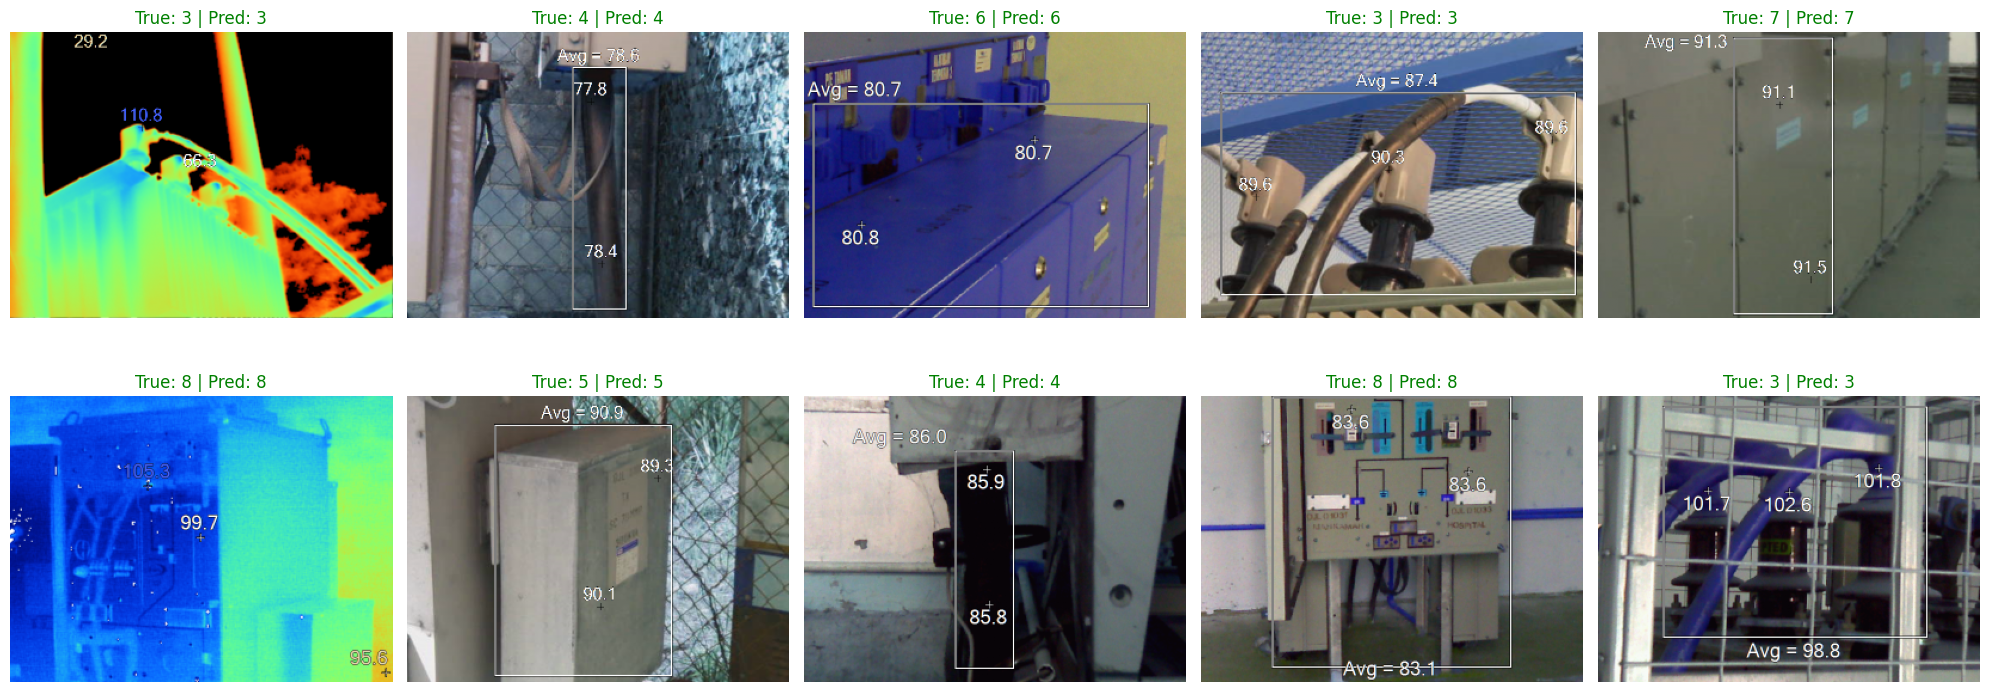

In [99]:

# ----------------- CLASSIFICATION CHECK (10 Samples) -----------------
sample_indices = random.sample(range(len(X_test)), 10)

plt.figure(figsize=(20, 8))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    pred_label = np.argmax(model.predict(X_test[idx][np.newaxis]))
    true_label = np.argmax(y_test[idx])
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"True: {true_label} | Pred: {pred_label}", color=color, fontsize=12)
plt.tight_layout()
plt.show()

🧊 Thermal CSV Path: ./data/organized1/RMU/Cable Entry/IR_07543.csv


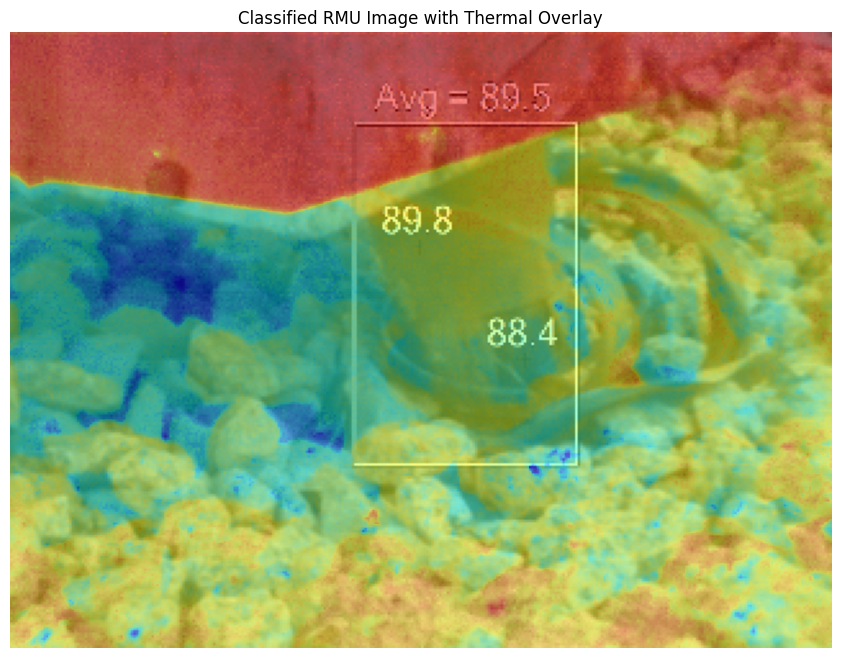

In [114]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv

# Use the already chosen RMU image from classification section
# `chosen_image` is already defined from the previous block

# Load the image
image = cv2.imread(chosen_image)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Construct thermal CSV path based on matched filename
csv_basename = os.path.basename(chosen_image).replace('.png', '.csv')
csv_folder = chosen_image.replace('full_sample_resized', 'organized1').rsplit('/', 1)[0]
thermal_csv_path = os.path.join(csv_folder, csv_basename)
print(f"🧊 Thermal CSV Path: {thermal_csv_path}")

# Load thermal CSV
def load_smartview_csv(path):
    with open(path, 'r', encoding='utf-16', errors='ignore') as f:
        reader = csv.reader(f)
        rows = [row for row in reader if row and row[0].strip().isdigit()]
        matrix = np.array([[float(val) for val in row[1:] if val.strip()] for row in rows], dtype=np.float32)
    return matrix

thermal = load_smartview_csv(thermal_csv_path)

# Resize image to match thermal shape (pixel-to-pixel)
thermal_height, thermal_width = thermal.shape
image_resized = cv2.resize(image_rgb, (thermal_width, thermal_height))

# Visualize the overlay
plt.figure(figsize=(12, 8))
plt.imshow(image_resized)
plt.imshow(thermal, cmap='jet', alpha=0.5)
plt.title("Classified RMU Image with Thermal Overlay")
plt.axis('off')
plt.show()

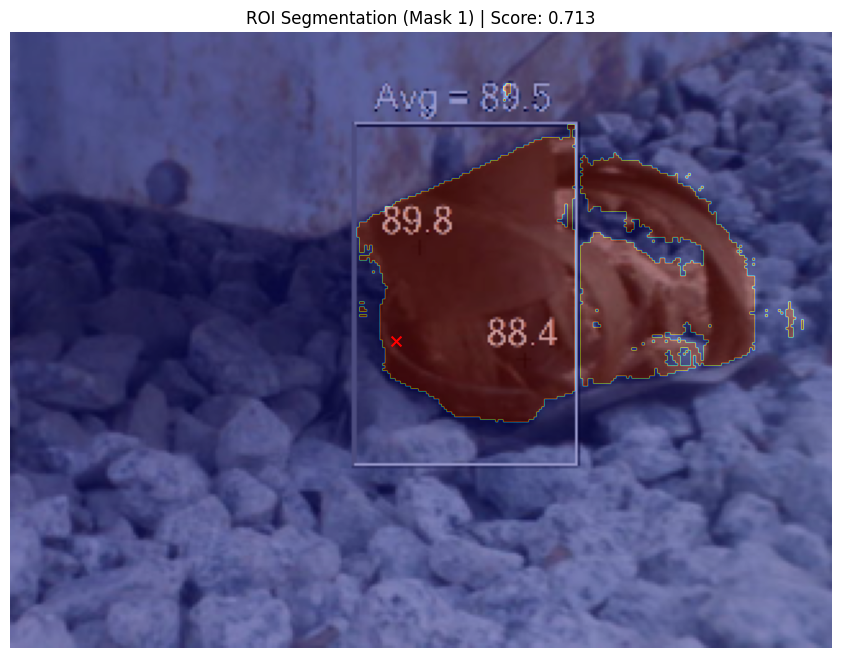

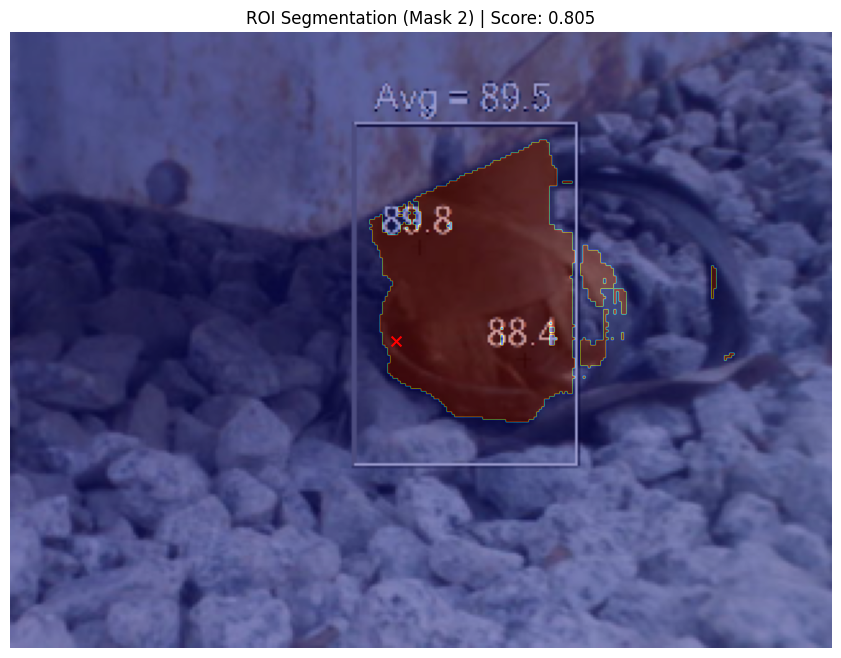

In [115]:
from segment_anything import SamPredictor, sam_model_registry
import torch

# Initialize SAM model
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth").to("cuda" if torch.cuda.is_available() else "cpu")
predictor = SamPredictor(sam)

# Resize image to 320x240 for consistency
image_rgb = cv2.resize(image_rgb, (320, 240), interpolation=cv2.INTER_LINEAR)

# Set the image for SAM
predictor.set_image(image_rgb)

# Fixed dot position near center
input_point = np.array([[150, 120]])  # (x, y)
input_label = np.array([1])  # foreground point

# Get 3 SAM masks from the dot
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Show only the .png image + ROI masks (no thermal yet)
for i in range(2):
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.imshow(masks[i], cmap='jet', alpha=0.4)
    plt.scatter(*input_point[0], color='red', s=50, marker='x')
    plt.title(f"ROI Segmentation (Mask {i+1}) | Score: {scores[i]:.3f}")
    plt.axis('off')
    plt.show()

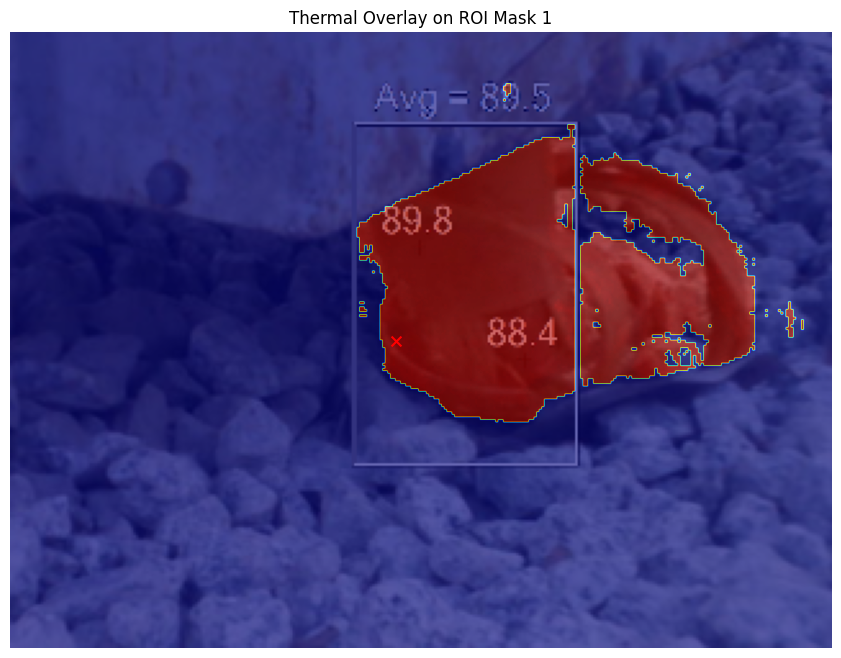

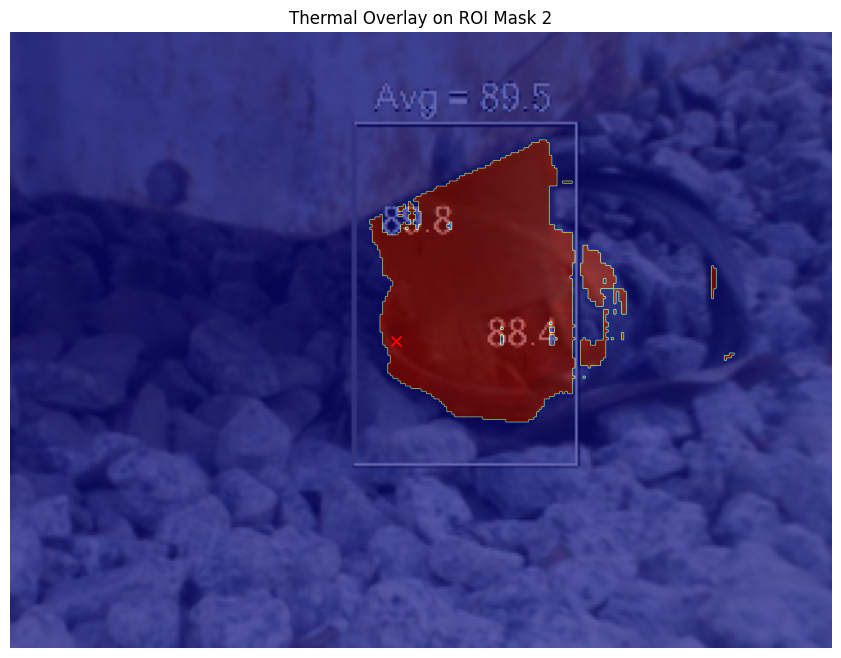

In [116]:
# Resize the thermal matrix to match the SAM input image
thermal_resized = cv2.resize(thermal, (320, 240), interpolation=cv2.INTER_NEAREST)

# Show both masks with thermal overlay
for i in range(2):
    # Create a masked version of the thermal data
    thermal_masked = np.zeros_like(thermal_resized)
    thermal_masked[masks[i]] = thermal_resized[masks[i]]

    # Plot the original image with masked thermal heatmap
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.imshow(thermal_masked, cmap='jet', alpha=0.6)
    plt.scatter(*input_point[0], color='red', s=50, marker='x')
    plt.title(f"Thermal Overlay on ROI Mask {i+1}")
    plt.axis('off')
    plt.show()


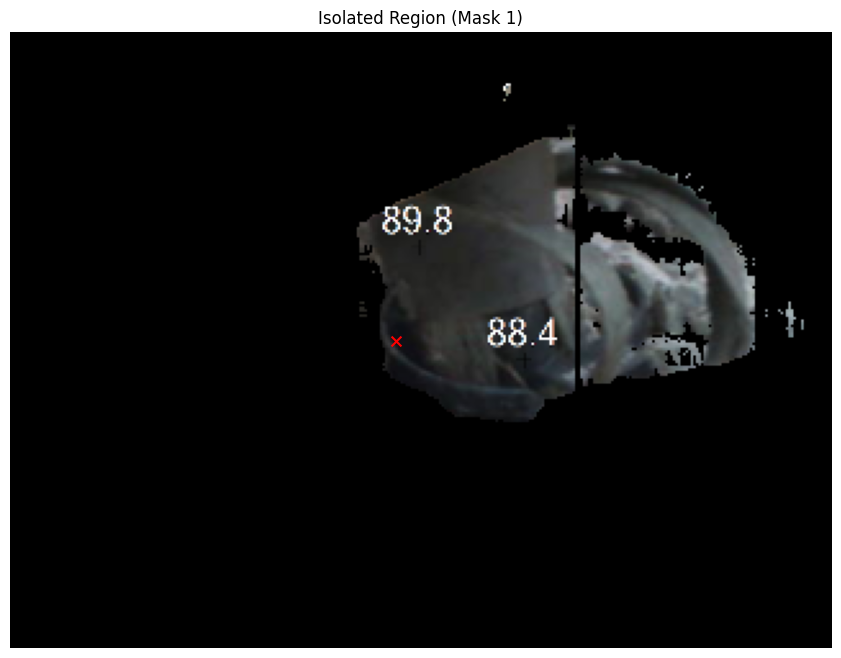

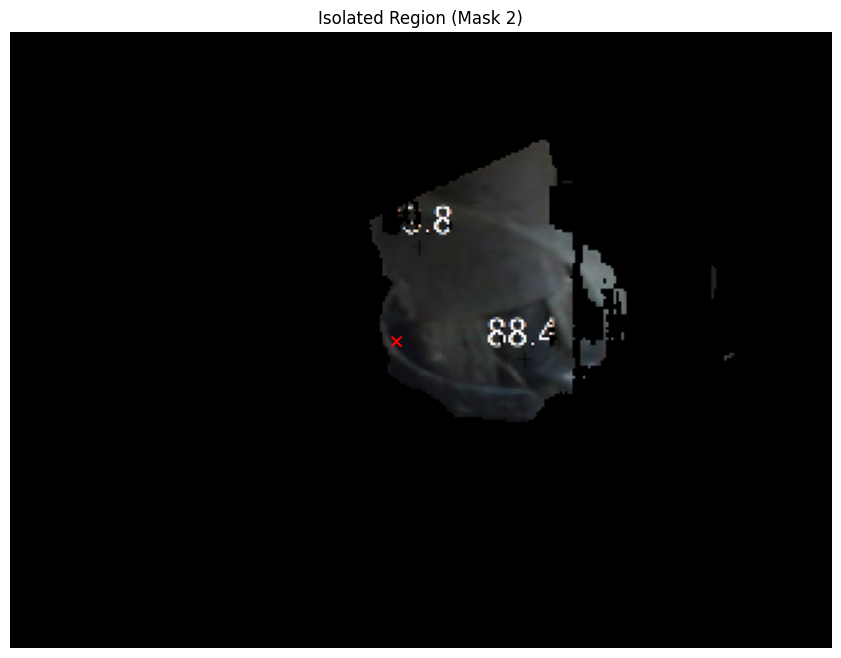

In [117]:
from segment_anything import sam_model_registry, SamPredictor
import torch

# Load SAM model
SAM_CHECKPOINT = "sam_vit_b_01ec64.pth"
DEVICE = "cpu"
sam = sam_model_registry["vit_b"](checkpoint=SAM_CHECKPOINT).to(DEVICE)
predictor = SamPredictor(sam)

# Resize image to (320, 240) and set for SAM
image_rgb = cv2.resize(image_rgb, (320, 240), interpolation=cv2.INTER_LINEAR)
predictor.set_image(image_rgb)

# Dot location near center
input_point = np.array([[150, 120]])
input_label = np.array([1])

# Predict masks with dot method
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True
)

# Visualize isolated ROI (no background) for first 2 masks
for i in range(2):
    roi = np.zeros_like(image_rgb)
    roi[masks[i]] = image_rgb[masks[i]]

    plt.figure(figsize=(12, 8))
    plt.imshow(roi)
    plt.scatter(*input_point[0], color='red', s=50, marker='x')
    plt.title(f"Isolated Region (Mask {i+1})")
    plt.axis('off')
    plt.show()

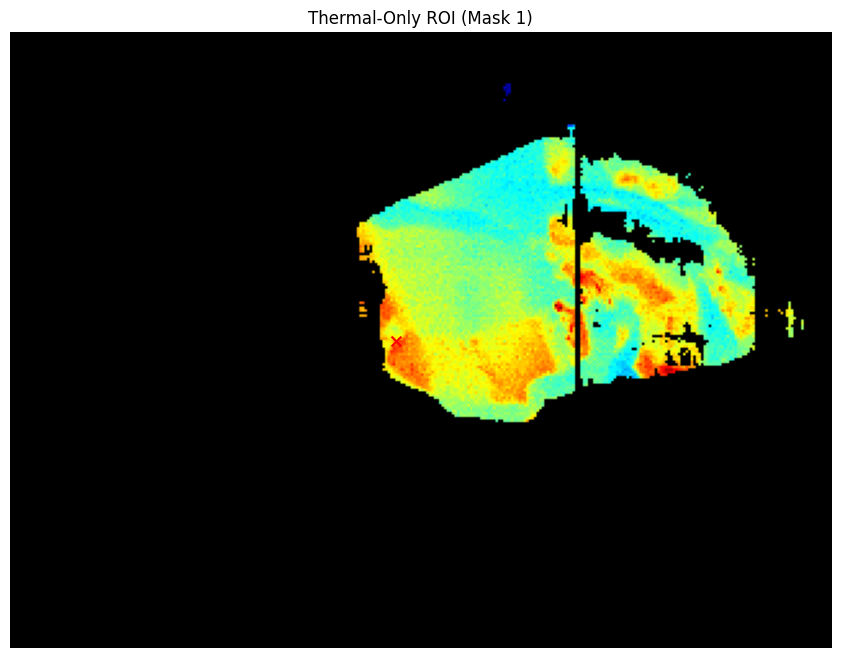

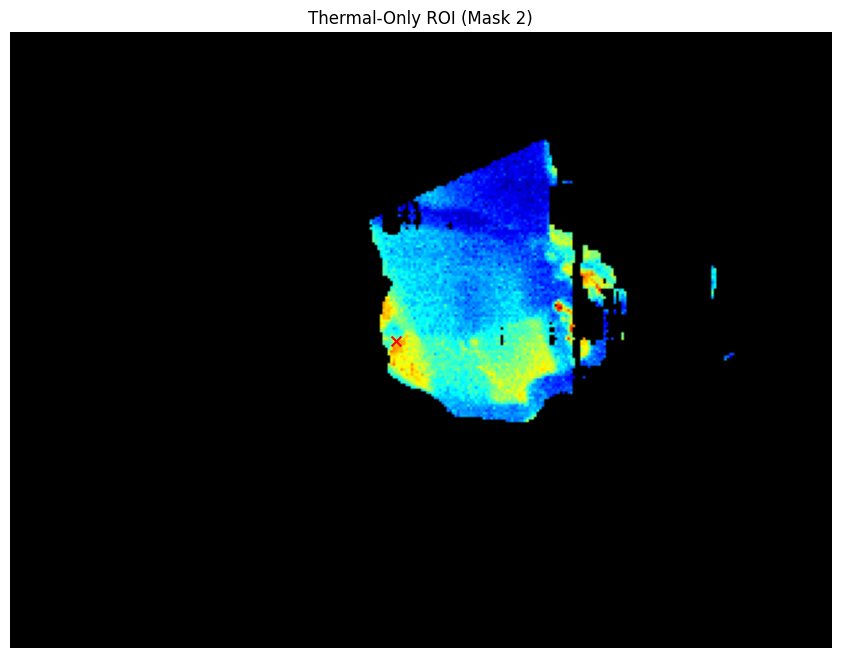

In [118]:
# Resize thermal data to match (320, 240)
thermal_resized = cv2.resize(thermal, (320, 240), interpolation=cv2.INTER_NEAREST)

# Show isolated ROI + thermal overlay without background
for i in range(2):
    # Extract thermal only where the mask is active
    thermal_masked = np.zeros_like(thermal_resized)
    thermal_masked[masks[i]] = thermal_resized[masks[i]]

    # Normalize only the non-zero (masked) values
    norm = np.zeros_like(thermal_masked, dtype=np.uint8)
    nonzero_mask = thermal_masked > 0

    if np.any(nonzero_mask):
        min_val = np.min(thermal_masked[nonzero_mask])
        max_val = np.max(thermal_masked[nonzero_mask])
        if max_val > min_val:
            norm_vals = ((thermal_masked[nonzero_mask] - min_val) / (max_val - min_val) * 255).astype(np.uint8)
        else:
            norm_vals = np.zeros_like(thermal_masked[nonzero_mask], dtype=np.uint8)
        norm[nonzero_mask] = norm_vals

        thermal_colormap = cv2.applyColorMap(norm, cv2.COLORMAP_JET)
    else:
        thermal_colormap = np.zeros((*thermal_masked.shape, 3), dtype=np.uint8)

    # Create a black canvas and overlay thermal region
    isolated_roi = np.zeros((240, 320, 3), dtype=np.uint8)
    isolated_roi[masks[i]] = thermal_colormap[masks[i]]

    # Display
    plt.figure(figsize=(12, 8))
    plt.imshow(isolated_roi)
    plt.scatter(*input_point[0], color='red', s=50, marker='x')
    plt.title(f"Thermal-Only ROI (Mask {i+1})")
    plt.axis('off')
    plt.show()


=== Mask 1 ===
Max Temp: 93.10°F
Min Temp: 86.10°F
Delta T: 7.00°F
Status: NORMAL


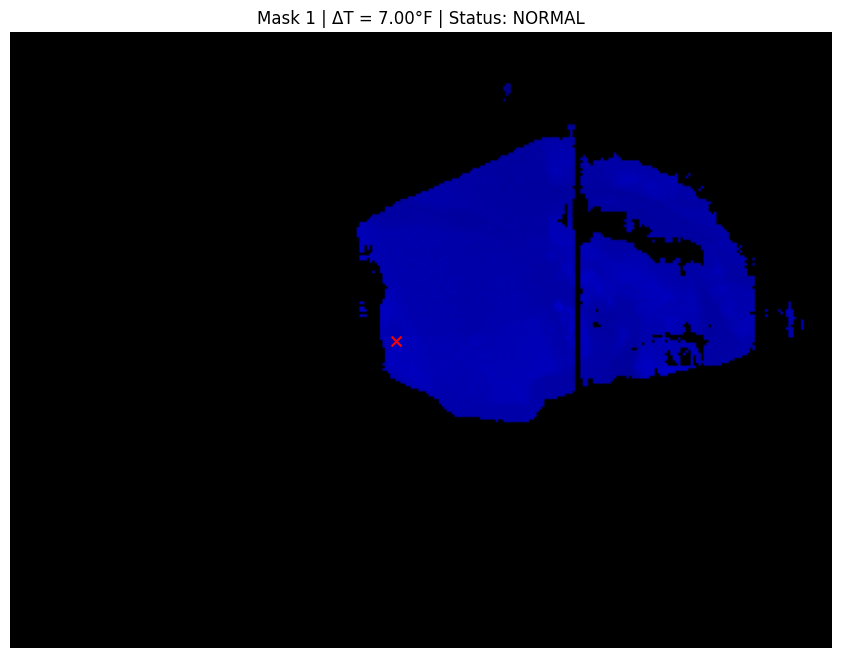


=== Mask 2 ===
Max Temp: 90.80°F
Min Temp: 86.10°F
Delta T: 4.70°F
Status: NORMAL


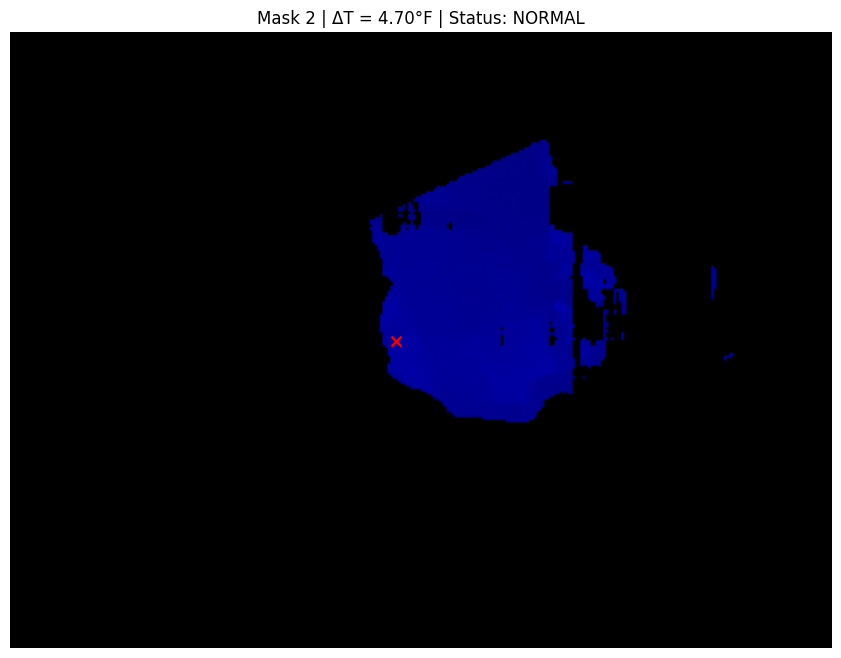

In [119]:
# Resize thermal data to match (320, 240)
thermal_resized = cv2.resize(thermal, (320, 240), interpolation=cv2.INTER_NEAREST)

# Loop through Mask 1 and 2
for i in range(2):
    mask = masks[i]

    # Extract temperatures in the masked region
    temps = thermal_resized[mask]

    # Avoid invalid segments
    if len(temps[temps > 0]) == 0:
        print(f"Mask {i+1}: No valid temperature region.")
        continue

    max_temp = np.max(temps)
    min_temp = np.min(temps[temps > 0])
    delta_t = max_temp - min_temp
    status = "DEFECT" if delta_t > 33.8 else "NORMAL"

    # Print Delta T stats
    print(f"\n=== Mask {i+1} ===")
    print(f"Max Temp: {max_temp:.2f}°F")
    print(f"Min Temp: {min_temp:.2f}°F")
    print(f"Delta T: {delta_t:.2f}°F")
    print(f"Status: {status}")

    # Prepare visualization (just thermal ROI)
    thermal_masked = np.zeros_like(thermal_resized)
    thermal_masked[mask] = thermal_resized[mask]
    thermal_colored = cv2.applyColorMap(
        cv2.normalize(thermal_masked, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8),
        cv2.COLORMAP_JET
    )

    # Only show thermal inside the ROI
    isolated_roi = np.zeros((240, 320, 3), dtype=np.uint8)
    isolated_roi[mask] = thermal_colored[mask]

    # Show the masked thermal region
    plt.figure(figsize=(12, 8))
    plt.imshow(isolated_roi)
    plt.scatter(*input_point[0], color='red', s=50, marker='x')
    plt.title(f"Mask {i+1} | ΔT = {delta_t:.2f}°F | Status: {status}")
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 35ms/step

🔍 Classified Compartment: RMU - Cable Entry (Label ID: 4)

=== Mask 1 ===
Max Temp: 93.10°F
Min Temp: 86.10°F
Delta T: 7.00°F
Status: NORMAL


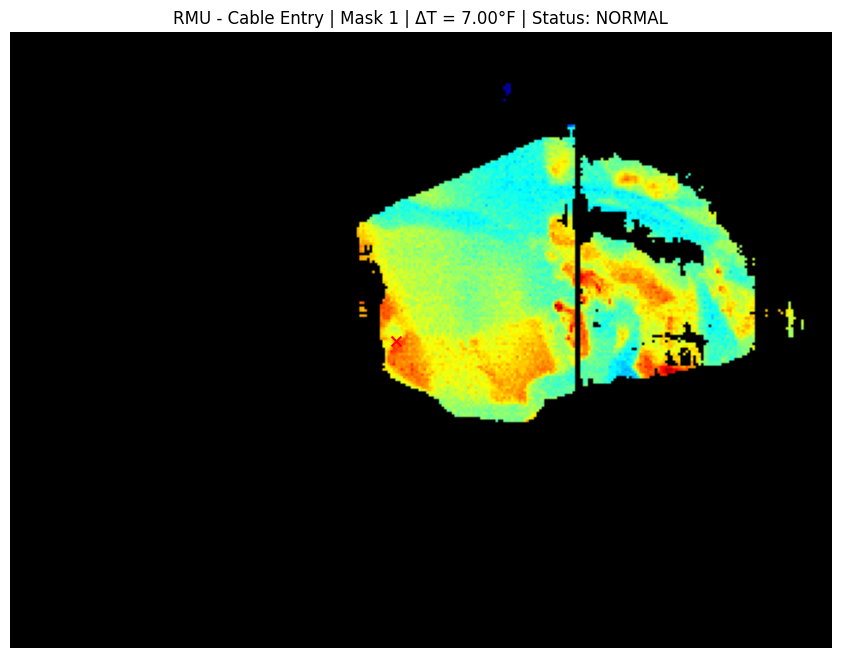


=== Mask 2 ===
Max Temp: 90.80°F
Min Temp: 86.10°F
Delta T: 4.70°F
Status: NORMAL


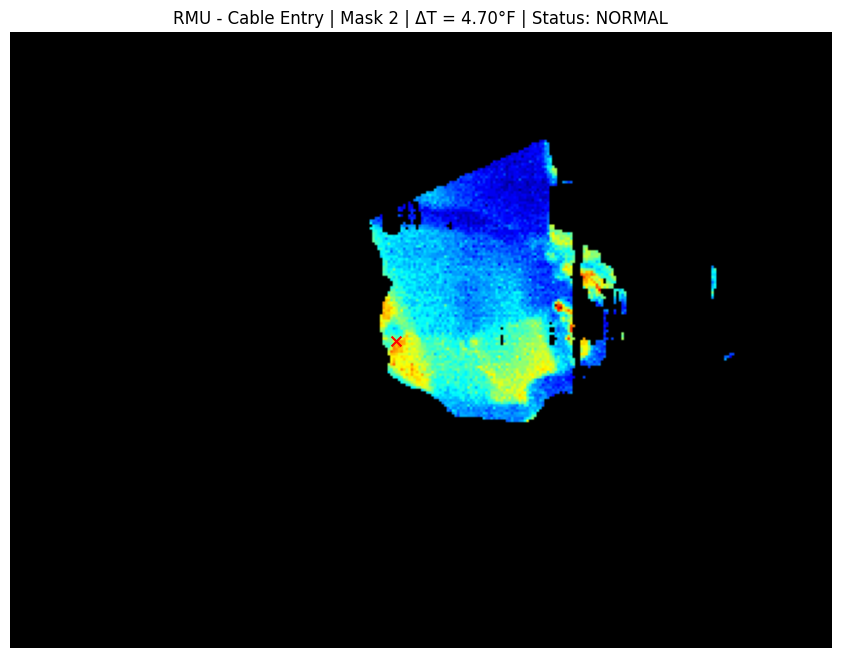

In [120]:
# ----------------- Resize and Predict Compartment -----------------
# Resize image to 320x240 and normalize for classifier
img_classify = cv2.imread(chosen_image)
img_classify = cv2.resize(img_classify, (320, 240))
img_classify = img_classify / 255.0

# Predict compartment label
pred_index = np.argmax(model.predict(img_classify[np.newaxis]))
label_to_name = {v: f"{k[0]} - {k[1]}" for k, v in compartment_labels.items()}
pred_label = label_to_name.get(pred_index, "Unknown")

print(f"\n🔍 Classified Compartment: {pred_label} (Label ID: {pred_index})")

# ----------------- Resize thermal data to match (320, 240) -----------------
thermal_resized = cv2.resize(thermal, (320, 240), interpolation=cv2.INTER_NEAREST)

# ----------------- Delta T + ROI Visualization (Mask 1 & 2) -----------------
for i in range(2):
    mask = masks[i]
    temps = thermal_resized[mask]

    if len(temps[temps > 0]) == 0:
        print(f"\nMask {i+1}: No valid temperature region.")
        continue

    max_temp = np.max(temps)
    min_temp = np.min(temps[temps > 0])
    delta_t = max_temp - min_temp
    status = "DEFECT" if delta_t > 33.8 else "NORMAL"

    print(f"\n=== Mask {i+1} ===")
    print(f"Max Temp: {max_temp:.2f}°F")
    print(f"Min Temp: {min_temp:.2f}°F")
    print(f"Delta T: {delta_t:.2f}°F")
    print(f"Status: {status}")

    # Mask and normalize thermal region only
    thermal_masked = np.zeros_like(thermal_resized)
    thermal_masked[mask] = thermal_resized[mask]

    norm = np.zeros_like(thermal_masked, dtype=np.uint8)
    nonzero_mask = thermal_masked > 0
    if np.any(nonzero_mask):
        min_val = np.min(thermal_masked[nonzero_mask])
        max_val = np.max(thermal_masked[nonzero_mask])
        if max_val > min_val:
            norm_vals = ((thermal_masked[nonzero_mask] - min_val) / (max_val - min_val) * 255).astype(np.uint8)
        else:
            norm_vals = np.zeros_like(thermal_masked[nonzero_mask], dtype=np.uint8)
        norm[nonzero_mask] = norm_vals
        thermal_colored = cv2.applyColorMap(norm, cv2.COLORMAP_JET)
    else:
        thermal_colored = np.zeros((*thermal_masked.shape, 3), dtype=np.uint8)

    # Create final isolated ROI image
    isolated_roi = np.zeros((240, 320, 3), dtype=np.uint8)
    isolated_roi[mask] = thermal_colored[mask]

    plt.figure(figsize=(12, 8))
    plt.imshow(isolated_roi)
    plt.scatter(*input_point[0], color='red', s=50, marker='x')
    plt.title(f"{pred_label} | Mask {i+1} | ΔT = {delta_t:.2f}°F | Status: {status}")
    plt.axis('off')
    plt.show()

✔️ Centroid for refinement: (368, 396)


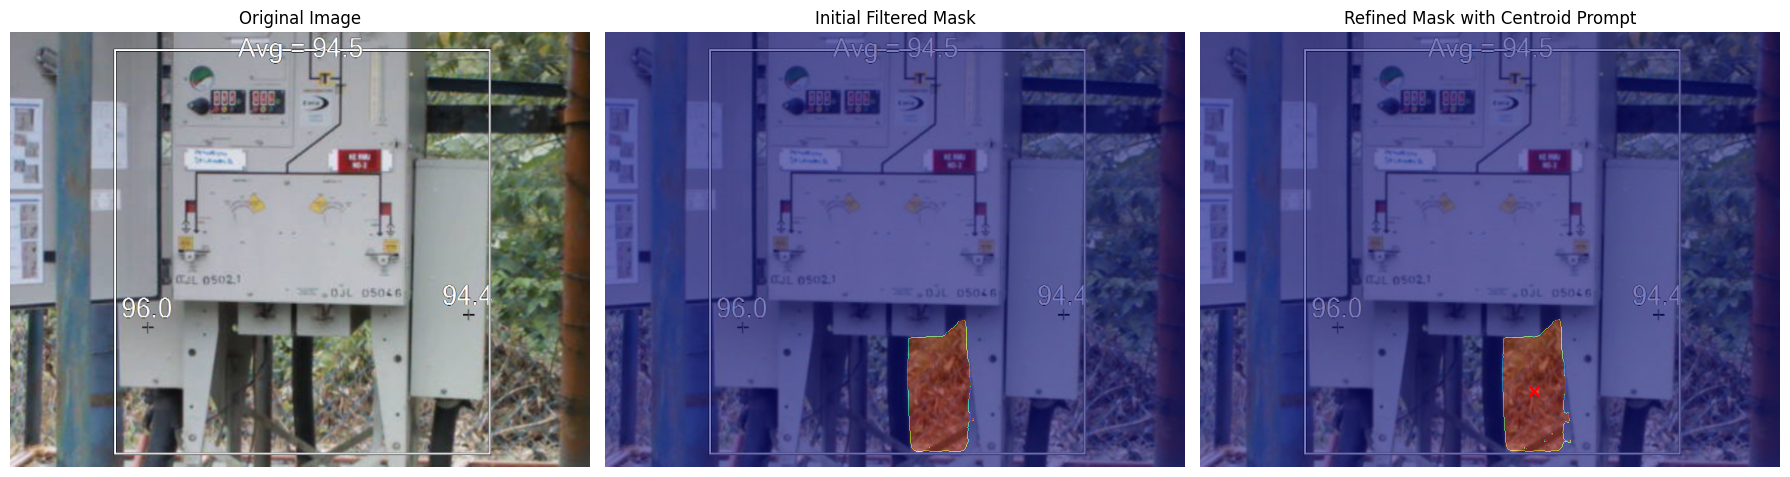

In [35]:
# === Run for a Single Image ===
sample_image = './data/resized_output/RMU/Fuse/IR_06835_resized.png'  # Use any classified or RMU image
auto_sam_segmentation(sample_image, sam)

In [60]:
def auto_sam_fixed_dot(image_path, sam, dot=(150, 120)):
    image_bgr = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # SAM Predictor
    predictor = SamPredictor(sam)
    predictor.set_image(image_rgb)

    input_point = np.array([dot])
    input_label = np.array([1])  # foreground
    masks, scores, _ = predictor.predict(
        point_coords=input_point,
        point_labels=input_label,
        multimask_output=True
    )

    # Visualize all 3 masks
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    for i in range(3):
        axs[i].imshow(image_rgb)
        axs[i].imshow(masks[i], cmap='jet', alpha=0.5)
        axs[i].scatter(*dot, color='red', s=50, marker='x')
        axs[i].set_title(f"Mask {i+1} | Score: {scores[i]:.3f}")
        axs[i].axis('off')

    plt.tight_layout()
    plt.show()

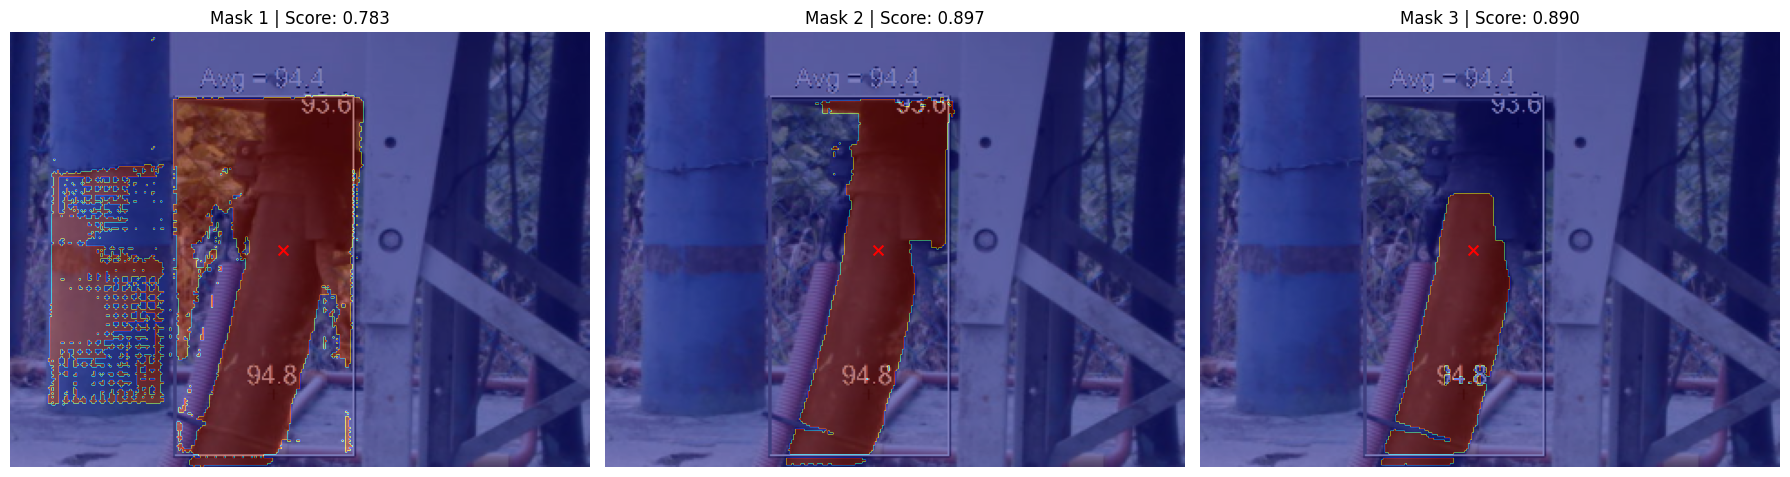

In [70]:
sample_image = './data/full_sample_resized/RMU/Cable Entry/IR_06838.png'
auto_sam_fixed_dot(sample_image, sam)